In [1]:
## First, import general packages for running python analysis:
import os
import numpy as np
from matplotlib.pyplot import *
import h5py
import datetime
import pandas
import pytz

## Then, import the beamcals module packages and initialize 'gbosite' class:
from beamcals import corr
from beamcals import concat
from beamcals import drone
from beamcals import bicolog
import beamcals.plotting_utils as pu
import beamcals.fitting_utils as fu
import beamcals.geometry_utils as gu
import beamcals.time_utils as tu
from beamcals.sites import site
gbosite=site.site('../beamcals/beamcals/sites/GBO_config.npz')

In [2]:
## Read in the Drone_Data class:
dronedir='/hirax/all_drone_data/datcon_csv/'
dronetest=drone.Drone_Data(Drone_Directory=dronedir,FLYTAG='FLY613.csv',site_class=gbosite)

Initializing drone data via datcon_csv routine: FLY613.csv
 --> Skipping rows 1 to 499 to eliminate NAN values
 --> Attempting to load position data from RTK
 ----> RTK data contains 0/15570 non-nan values
 ----> RTK Data not usable for this data file...
 --> Loading position data from GPS(0) instead:
Timestamp interpolation succeeded
 --> generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
 --> generating dish and receiver line of sight coordinates.


In [13]:
drone_prefix="/hirax/all_drone_data/datcon_csv/"
dronecat=np.array([x for x in np.sort(os.listdir(drone_prefix)) if 'FLY6' in x])
print(dronecat)

dronestart=np.zeros(len(dronecat)).astype('object')
droneend=np.zeros(len(dronecat)).astype('object')
for i,x in enumerate(dronecat):
    tempdat=pandas.read_csv(drone_prefix+x,skiprows=np.arange(1,500).tolist(),low_memory=False)
    try:
        print(x)
        temptime=np.array(tu.interp_time(tempdat)["UTC"],dtype='object')
        dronestart[i]=temptime[0]
        droneend[i]=temptime[-1]
    except IndexError:
        dronestart[i]=np.nan
        droneend[i]=np.nan
        pass

['FLY600.csv' 'FLY601.csv' 'FLY602.csv' 'FLY603.csv' 'FLY604.csv'
 'FLY605.csv' 'FLY606.csv' 'FLY607.csv' 'FLY608.csv' 'FLY609.csv'
 'FLY610.csv' 'FLY611.csv' 'FLY612.csv' 'FLY613.csv' 'FLY614.csv'
 'FLY615.csv' 'FLY616.csv' 'FLY617.csv' 'FLY618.csv' 'FLY619.csv'
 'FLY620.csv' 'FLY621.csv' 'FLY622.csv' 'FLY623.csv' 'FLY624.csv'
 'FLY625.csv' 'FLY626.csv' 'FLY627.csv' 'FLY628.csv' 'FLY629.csv'
 'FLY630.csv' 'FLY631.csv' 'FLY632.csv' 'FLY633.csv' 'FLY634.csv'
 'FLY635.csv' 'FLY636.csv' 'FLY637.csv' 'FLY638.csv' 'FLY639.csv'
 'FLY640.csv' 'FLY641.csv' 'FLY642.csv' 'FLY643.csv' 'FLY644.csv'
 'FLY645.csv' 'FLY646.csv' 'FLY647.csv' 'FLY648.csv' 'FLY649.csv'
 'FLY650.csv' 'FLY651.csv' 'FLY652.csv' 'FLY653.csv' 'FLY654.csv'
 'FLY655.csv']
FLY600.csv
Timestamp interpolation succeeded
FLY601.csv
Timestamp interpolation succeeded
FLY602.csv
Timestamp interpolation succeeded
FLY603.csv
Timestamp interpolation succeeded
FLY604.csv
Timestamp interpolation succeeded
FLY605.csv
Timestamp interpolation

Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Detected >1s error, retrying
Timestamp interpolation succeeded
FLY651.csv
Timestamp interpolation succeeded
FLY652.csv
Timestamp interpolation succeeded
FLY653.csv
Timestamp interpolation succeeded
FLY654.csv
Timestamp interpolation succeeded
FLY655.csv
Timestamp interpolation succeeded


<ipython-input-46-e92308d73990>:3: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  plot([np.datetime64(dronestart[i]),np.datetime64(droneend[i])])


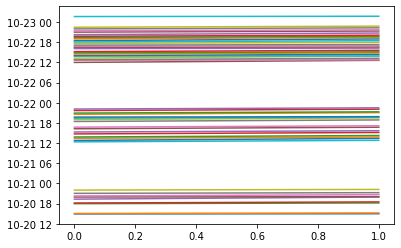

In [46]:
for i in range(len(dronecat)):
    try:
        plot([np.datetime64(dronestart[i]),np.datetime64(droneend[i])])
    except ValueError:
        pass

In [53]:
corr_prefix="/hirax/GBO_Oct_2021/TONE_ACQ/"
gain_prefix="/hirax/GBO_Oct_2021/TONE_ACQ/digital_gains/"
corrcat=np.array([x for x in np.sort(os.listdir(corr_prefix)) if '202110' in x])
print(corrcat)


corrstart=np.zeros(len(corrcat)).astype('object')
corrend=np.zeros(len(corrcat)).astype('object')
for i,x in enumerate(corrcat):
    try:
        dirstr=corr_prefix+str(x)+"/corr/"+os.listdir(corr_prefix+str(x)+"/corr/")[0]+"/"
        gaindir=gain_prefix+str(x)+"_yale_digitalgain/"
        ct=corr.Corr_Data(Data_Directory=dirstr,Gain_Directory=gaindir,site_class=gbosite,Data_File_Index=[0,-1])
        #plot(ct.t_arr_datetime)
        corrstart[i]=ct.t_arr_datetime[0]
        corrend[i]=ct.t_arr_datetime[-1]
    except FileNotFoundError:
        pass
    except IndexError:
        pass


['20211020T143756Z_yale_drone' '20211020T151009Z_yale_drone'
 '20211020T151546Z_yale_drone' '20211020T152351Z_yale_drone'
 '20211020T153857Z_yale_drone' '20211020T160624Z_yale_drone'
 '20211020T161445Z_yale_drone' '20211020T163539Z_yale_drone'
 '20211020T163950Z_yale_drone' '20211020T170138Z_yale_drone'
 '20211020T170205Z_yale_drone' '20211020T170217Z_yale_drone'
 '20211020T171948Z_yale_drone' '20211020T172040Z_yale_drone'
 '20211020T193238Z_yale_drone' '20211020T194723Z_yale_drone'
 '20211020T201554Z_yale_drone' '20211020T210151Z_yale_drone'
 '20211020T215858Z_yale_drone' '20211021T123840Z_yale_drone'
 '20211021T131031Z_yale_drone' '20211021T132658Z_yale_drone'
 '20211021T133640Z_yale_drone' '20211021T135105Z_yale_drone'
 '20211021T143758Z_yale_drone' '20211021T144905Z_yale_drone'
 '20211021T151650Z_yale_drone' '20211021T161500Z_yale_drone'
 '20211021T164739Z_yale_drone' '20211021T183430Z_yale_drone'
 '20211021T185805Z_yale_drone' '20211021T192212Z_yale_drone'
 '20211021T194316Z_yale_

 --> Loading File: 0001/0123Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211021T164739Z_yale_drone/corr/20211021T164751Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0101Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211021T183430Z_yale_drone/corr/20211021T183443Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0092Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211021T185805Z_yale_drone/corr/20211021T185818Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0113Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211021T192212Z_yale_drone/corr/20211021T192225Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in 

 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0004Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211022T215446Z_yale_drone/corr/20211022T215459Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0107Initializing Correlator Class using:
 --> /hirax/GBO_Oct_2021/TONE_ACQ/20211022T221722Z_yale_drone/corr/20211022T221734Z/
 --> Arrays initialized with shape (2, 256, 1023, 16)
Assigning array values by reading in data files:
 --> Loading File: 0001/0163

<ipython-input-54-05be58348487>:6: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax1.plot([np.datetime64(dronestart[i]),np.datetime64(droneend[i])])
<ipython-input-54-05be58348487>:12: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  ax2.plot([np.datetime64(corrstart[i]),np.datetime64(corrend[i])])


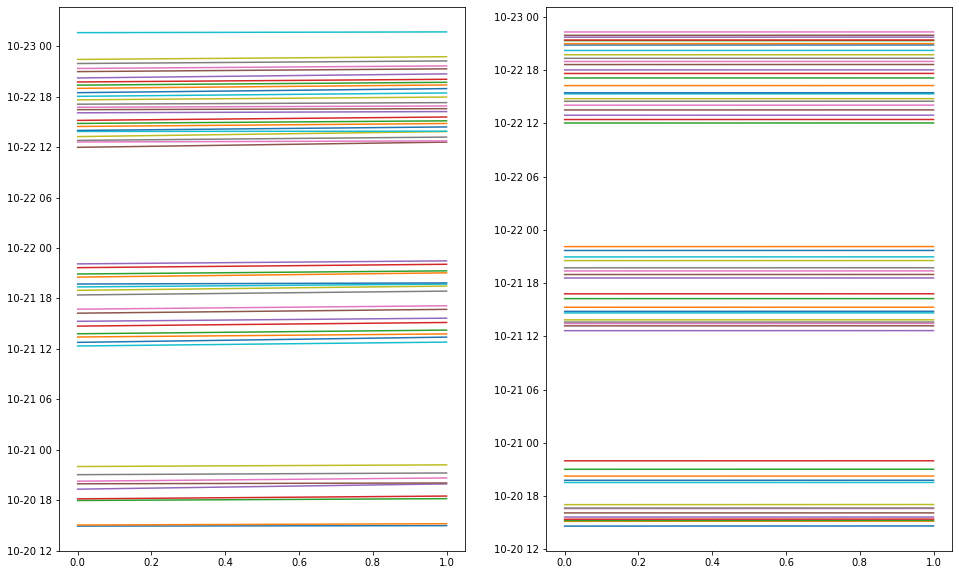

In [54]:
fig=figure(figsize=(16,10))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

for i in range(len(dronecat)):
    try:
        ax1.plot([np.datetime64(dronestart[i]),np.datetime64(droneend[i])])
    except ValueError:
        pass
    
for i in range(len(corrcat)):
    try:
        ax2.plot([np.datetime64(corrstart[i]),np.datetime64(corrend[i])])
    except ValueError:
        pass

In [56]:
corrstart

array([datetime.datetime(2021, 10, 20, 14, 38, 6, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 15, 10, 20, 174405, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 15, 15, 56, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 15, 24, 31, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 15, 39, 8, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 16, 7, 4, tzinfo=<UTC>), 0.0,
       datetime.datetime(2021, 10, 20, 16, 36, 20, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 16, 40, tzinfo=<UTC>), 0.0, 0.0,
       datetime.datetime(2021, 10, 20, 17, 2, 55, 268908, tzinfo=<UTC>),
       0.0, 0.0,
       datetime.datetime(2021, 10, 20, 19, 32, 44, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 19, 47, 34, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 20, 16, 1, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 21, 1, 58, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 20, 21, 59, 6, tzinfo=<UTC>),
       datetime.datetime(2021, 10, 21, 1